<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных." data-toc-modified-id="Загрузка-данных.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных.</a></span></li><li><span><a href="#Предобработка" data-toc-modified-id="Предобработка-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка</a></span></li><li><span><a href="#Исследовательский-анализ" data-toc-modified-id="Исследовательский-анализ-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ</a></span></li><li><span><a href="#Корреляционный-анализ" data-toc-modified-id="Корреляционный-анализ-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Корреляционный анализ</a></span></li><li><span><a href="#Задача-регрессии" data-toc-modified-id="Задача-регрессии-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Задача регрессии</a></span></li><li><span><a href="#Задача-классификации." data-toc-modified-id="Задача-классификации.-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Задача классификации.</a></span></li><li><span><a href="#Сделайте-итоговые-выводы" data-toc-modified-id="Сделайте-итоговые-выводы-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Сделайте итоговые выводы</a></span></li></ul></div>

<div style="background-color:#D2DCFA; padding:10px;">
    
# Описание данных.
    
 МЫ работаем в IT-компании, которая выполняет на заказ проекты по машинному обучению. К нам обратился **фермер**, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».
    
    
 Условия позволяют фермеру очень **тщательно** отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы **каждая бурёнка давала не менее 6000 килограммов молока в год**, а её надой был **вкусным** — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих коровок!
    
    
 Поэтому он просит нас разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах. Нам нужно создать **две** прогнозные модели для отбора бурёнок в поголовье:
    
 - Первая будет прогнозировать возможный **`удой`** коровы (целевой признак Удой);
    
 - Вторая — рассчитывать вероятность получить **`вкусное молоко`** от коровы (целевой признак Вкус молока).
    
С помощью модели нужно отобрать коров по двум критериям:
средний удой за год — не менее 6000 килограммов;
молоко должно быть вкусным.
---
 # Данные.
    
 Нам предоставлены 3 набора данных:
 1. Файл `ferma_main` хранит информацию о коровах:
    - `id` - уникальный идентификатор коровы.
    
    - `Удой, кг` — масса молока, которую корова даёт в год (в килограммах).
    - `ЭКЕ (Энергетическая кормовая единица)` — показатель питательности корма коровы.
    - `Сырой протеин, г` — содержание сырого протеина в корме (в граммах).
    - `СПО (Сахаро-протеиновое соотношение)` — отношение сахара к протеину в корме коровы.
    - `Порода` — порода коровы.
    - `Тип пастбища` — ландшафт лугов, на которых паслась корова.
    - `Порода папы быка` — порода папы коровы.
    - `Жирность, %` — содержание жиров в молоке (в процентах).
    - `Белок,%` — содержание белков в молоке (в процентах).
    - `Вкус молока` — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
    - `Возраст` — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

2. Файл `ferma_dad` хранит имя папы каждой коровы в стаде фермера:
    - `id` — уникальный идентификатор коровы.
    
    - `Имя Папы` — имя папы коровы.
    
3. Файл `cow_buy` — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой:
    - `Порода` — порода коровы.
    
    - `Тип пастбища` — ландшафт лугов, на которых паслась корова.
    - `Порода папы быка` — порода папы коровы.
    - `Имя_папы` — имя папы коровы.
    - `Текущая_жирность,%` — содержание жиров в молоке (в процентах).
    - `Текущий_уровень_белок,%` — содержание белков в молоке (в процентах).
    - `Возраст` — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

---

## Загрузка данных.

In [1]:
# код ревьюера
!pip install -U scikit-learn  
# код студента
!pip install phik

In [2]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix, precision_score, recall_score

import warnings

import phik

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)

In [3]:
try:
    df_main = pd.read_csv(r'C:\Users\ilyal\OneDrive\Рабочий стол\Портфолио\practicum_projects\cows_6\ferma_main.csv', sep=';', decimal=',')
    df_dad = pd.read_csv(r'C:\Users\ilyal\OneDrive\Рабочий стол\Портфолио\practicum_projects\cows_6\ferma_dad.csv', sep=';', decimal=',')
    df_buy = pd.read_csv(r'C:\Users\ilyal\OneDrive\Рабочий стол\Портфолио\practicum_projects\cows_6\cow_buy.csv', sep=';', decimal=',')
except:
    df_main = pd.read_csv('/datasets/ferma_main.csv', sep=';', decimal=',')
    df_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';', decimal=',')
    df_buy = pd.read_csv('/datasets/cow_buy.csv', sep=';', decimal=',')

# Выведем все датафреймы
display(df_main.head())
display(df_dad.head())
display(df_buy.head())

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


In [4]:
# Выведем информацию о датафреймах
display(df_main.info())
display(df_dad.info())
display(df_buy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


None

Данные не во всем соответствуют описанию. На этапе предобработки потребуется изменить названия столбцов, привести столбцы к правильному типу и привести все строковые значения к нижнему регистру.

---

## Предобработка 

Переименуем столбцы

In [5]:
# Переименование столбцов
df_main.rename(columns={"Удой, кг": "удой", "ЭКЕ (Энергетическая кормовая единица)": "эке", "Сырой протеин, г": "протеин",
                        "СПО (Сахаро-протеиновое соотношение)": "спо", "Порода": "порода", "Тип пастбища": "тип_пастбища",
                        "порода папы_быка": "порода_папы_быка", "Жирность,%": "жирность", "Белок,%": "белок",
                        "Вкус молока": "вкус", "Возраст": "возраст"}, inplace=True)

df_dad.rename(columns={"Имя Папы": "имя_папы_быка"}, inplace=True)

df_buy.rename(columns={"Порода": "порода", "Тип пастбища": "тип_пастбища", "порода папы_быка": "порода_папы_быка",
                       "Имя_папы": "имя_папы_быка", "Текущая_жирность,%": "жирность", "Текущий_уровень_белок,%": "белок",
                       "Возраст": "возраст"}, inplace=True)
display(df_main.head())
display(df_dad.head())
display(df_buy.head())

,id,удой,эке,протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


,id,имя_папы_быка
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


,порода,тип_пастбища,порода_папы_быка,имя_папы_быка,жирность,белок,возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


---

Переведем все значения в столбцах в нижний регистр

In [6]:
# Перевод всех строковых значений в нижний регистр
df_main = df_main.applymap(lambda x: x.lower() if type(x) == str else x)
df_dad = df_dad.applymap(lambda x: x.lower() if type(x) == str else x)
df_buy = df_buy.applymap(lambda x: x.lower() if type(x) == str else x)

display(df_main.head())
display(df_dad.head())
display(df_buy.head())

,id,удой,эке,протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус,возраст
0,1,5863,14.2,1743,0.890,вис бик айдиал,равнинное,айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,вис бик айдиал,равнинные,соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,рефлешнсоверинг,холмистое,соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,рефлешнсоверинг,холмистое,айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,вис бик айдиал,равнинные,соверин,3.73,3.073,вкусно,менее_2_лет


,id,имя_папы_быка
0,1,буйный
1,2,соловчик
2,3,барин
3,4,буйный
4,5,барин


,порода,тип_пастбища,порода_папы_быка,имя_папы_быка,жирность,белок,возраст
0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет
1,вис бик айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет
2,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет
3,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.061,более_2_лет
4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет


---

Проверим датафреймы на наличие явных дубликатов.

In [7]:
# Подсчетт явных дубликатов
print(f'Количество явных дубликатов в df_main = {df_main.duplicated().sum()}')
print(f'Количество явных дубликатов в df_dad = {df_dad.duplicated().sum()}')
print(f'Количество явных дубликатов в df_buy = {df_buy.duplicated().sum()}')

Количество явных дубликатов в df_main = 5
Количество явных дубликатов в df_dad = 0
Количество явных дубликатов в df_buy = 4


Удалим дубликаты только для основного датафрейма, так как выборка коров для покупки и так небольшая, а дубликаты могут и не оказаться таковыми.

In [8]:
# Удаление явных дубликатов
df_main = df_main.drop_duplicates()

In [9]:
# Проверка
print(f'Количество явных дубликатов в df_main = {df_main.duplicated().sum()}')

Количество явных дубликатов в df_main = 0


---

Проверим категориальные столбцы на наличие ошибок в названиях. Если такие есть, приведем их к корректному виду.

In [10]:
# Проверка уникальности строковых значений
list_of_cols_main = ['порода', 'порода_папы_быка', 'тип_пастбища', 'вкус', 'возраст']
list_of_cols_buy = ['порода', 'порода_папы_быка', 'тип_пастбища', 'возраст', 'имя_папы_быка']
for i in list_of_cols_main:
    print(f'Уникальные значения столбца {i}: {df_main[i].unique()}')
print()
for i in list_of_cols_buy:
    print(f'Уникальные значения столбца {i}: {df_buy[i].unique()}')

Уникальные значения столбца порода: ['вис бик айдиал' 'рефлешнсоверинг']
Уникальные значения столбца порода_папы_быка: ['айдиал' 'соверин' 'айдиалл']
Уникальные значения столбца тип_пастбища: ['равнинное' 'равнинные' 'холмистое']
Уникальные значения столбца вкус: ['вкусно' 'не вкусно']
Уникальные значения столбца возраст: ['более_2_лет' 'менее_2_лет']

Уникальные значения столбца порода: ['вис бик айдиал' 'рефлешнсоверинг']
Уникальные значения столбца порода_папы_быка: ['айдиал' 'соверин']
Уникальные значения столбца тип_пастбища: ['холмистое' 'равнинное']
Уникальные значения столбца возраст: ['более_2_лет' 'менее_2_лет']
Уникальные значения столбца имя_папы_быка: ['геркулес' 'буйный' 'барин' 'соловчик']


В столбцах `порода_папы_быка` и `тип_пастбища` присутствуют некорректные названия, а так же в обоих датафреймах поправим названия пород, заменим их.

In [11]:
df_main['порода_папы_быка'] = df_main['порода_папы_быка'].replace('айдиалл', 'айдиал')
df_main['тип_пастбища'] = df_main['тип_пастбища'].replace('равнинные', 'равнинное')
df_main['порода'] = df_main['порода'].replace('вис бик айдиал', 'айдиал')
df_main['порода'] = df_main['порода'].replace('рефлешнсоверинг', 'соверин')
df_buy['порода'] = df_buy['порода'].replace('вис бик айдиал', 'айдиал')
df_buy['порода'] = df_buy['порода'].replace('рефлешнсоверинг', 'соверин')

In [12]:
display(df_main.head())
display(df_buy.head())

,id,удой,эке,протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус,возраст
0,1,5863,14.2,1743,0.890,айдиал,равнинное,айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,айдиал,равнинное,соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,соверин,холмистое,соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,соверин,холмистое,айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,айдиал,равнинное,соверин,3.73,3.073,вкусно,менее_2_лет


,порода,тип_пастбища,порода_папы_быка,имя_папы_быка,жирность,белок,возраст
0,айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет
1,айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет
2,соверин,равнинное,соверин,барин,3.59,3.074,более_2_лет
3,соверин,холмистое,айдиал,буйный,3.40,3.061,более_2_лет
4,соверин,равнинное,айдиал,буйный,3.64,3.074,более_2_лет


Код отработал стабильно.

<div style="background-color:#C1F9DA; padding:10px;">
    
 Была проведена предобработка данных:
 - поменяли названия столбцов;
 - привели все строчные столбцы к нижнему регистру;
 - избавились от полных дубликатов;
 - привели названия пород и пастбищ к одному виду.

## Исследовательский анализ

---

Посмотрим на типы данных и построим всевозможные графики по всем столбцам. Избавимся от выбросов.

In [13]:
# Типы данных всех столбцов
df_main.dtypes

id                    int64
удой                  int64
эке                 float64
протеин               int64
спо                 float64
порода               object
тип_пастбища         object
порода_папы_быка     object
жирность            float64
белок               float64
вкус                 object
возраст              object
dtype: object

In [14]:
# Описание числовых данных
df_main.describe()

,id,удой,эке,протеин,спо,жирность,белок
count,629.00000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,315.00000,6188.750397,14.543879,1923.364070,0.913116,3.603657,3.075671
std,181.72094,1644.795489,1.306408,182.956251,0.032203,0.168656,0.002549
min,1.00000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,158.00000,5751.000000,13.500000,1771.000000,0.890000,3.590000,3.074000
50%,315.00000,6133.000000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.00000,6501.000000,15.600000,2062.000000,0.940000,3.720000,3.077000
max,629.00000,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


В столбце `удой` максимальное значение = **45616**, проверим его на наличие выбросов

<Axes: >

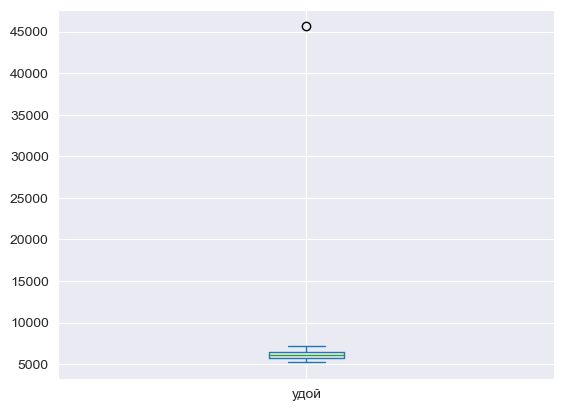

In [15]:
# Ящик с усами
df_main['удой'].plot(kind='box')

В столбце `удой` есть один выброс со значением `45616.000000`, удалим эту строку, на анализ это не повлияет.

In [16]:
# Оставляем подходящий диапазон
df_main = df_main.query('удой < 45000')

<Axes: >

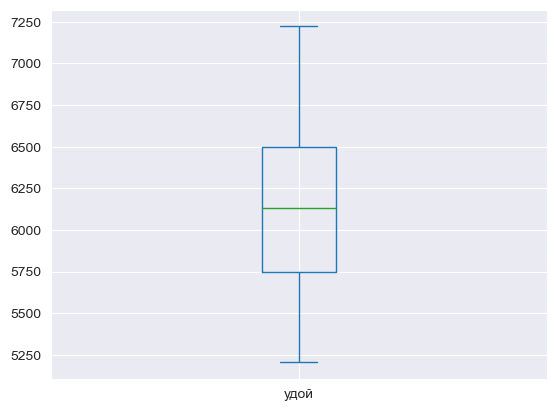

In [17]:
# Ящик с усами
df_main['удой'].plot(kind='box')

Посмотрим на распределения числовых столбцов с помощью гистограммы

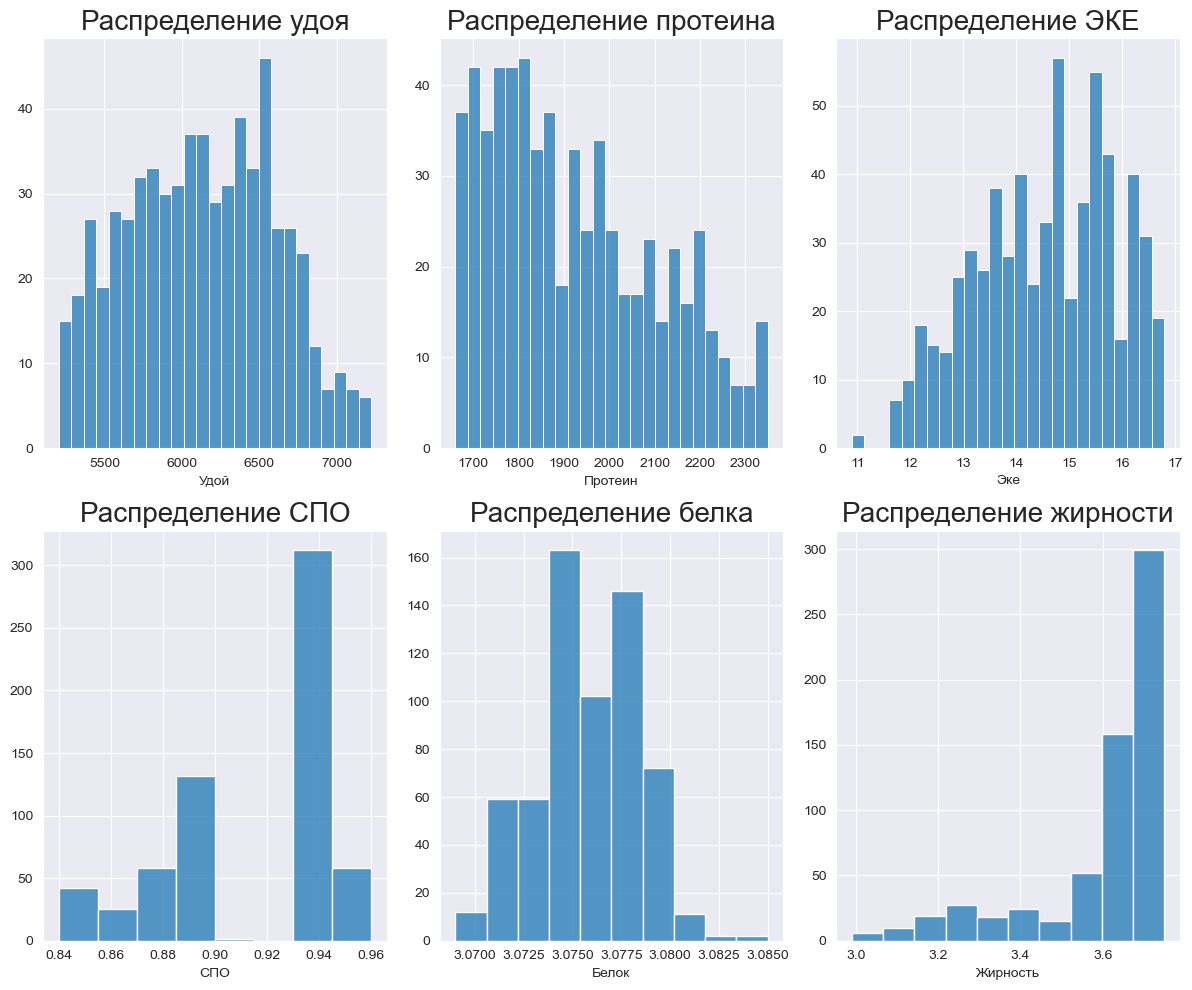

In [18]:
# Создание фигуры
plt.figure(figsize=(12, 10))

# Построение певрого графика
plt.subplot(2, 3, 1)
sns.histplot(data=df_main, x='удой', bins=25)
plt.xlabel('Удой')
plt.ylabel('')
plt.title('Распределение удоя', fontsize=20)

# Построение второго графика
plt.subplot(2, 3, 2)
sns.histplot(data=df_main, x='протеин', bins=25)
plt.xlabel('Протеин')
plt.ylabel('')
plt.title('Распределение протеина', fontsize=20)

# Построение третьего графика
plt.subplot(2, 3, 3)
sns.histplot(data=df_main, x='эке', bins=25)
plt.xlabel('Эке')
plt.ylabel('')
plt.title('Распределение ЭКЕ', fontsize=20)

# Построение четвертого графика
plt.subplot(2, 3, 4)
sns.histplot(data=df_main, x='спо', bins=8)
plt.xlabel('СПО')
plt.ylabel('')
plt.title('Распределение СПО', fontsize=20)

# Построение пятого графика
plt.subplot(2, 3, 5)
sns.histplot(data=df_main, x='белок', bins=10)
plt.xlabel('Белок')
plt.ylabel('')
plt.title('Распределение белка', fontsize=20)

# Построение шестого графика
plt.subplot(2, 3, 6)
sns.histplot(data=df_main, x='жирность', bins=10)
plt.xlabel('Жирность')
plt.ylabel('')
plt.title('Распределение жирности', fontsize=20)

plt.tight_layout()
plt.show()

 - Распределение `удоя` имеет вид нормального и небольшой всплеск в районе **6500 кг**
 
 - Распределение `протеина` скошено вправо, чаще всего в корме **1700-1800 г** протеина
 - Распределение `эке` скошено влево, чаще всего эта единица в районе **14-16**
 - Распределение `спо` разделено на 2 кластера, а разделяет их значение **0.90-0.92**
 - Распределение `белка` может указывать на нормальное распределение значений вокруг центрального пика с некоторой асимметрией
 - Распределение `жирности` скошено вправо, юольшинство значений лежат в интервале **3.5-3.65**

Построим ящики с усами для всех количественных переменных

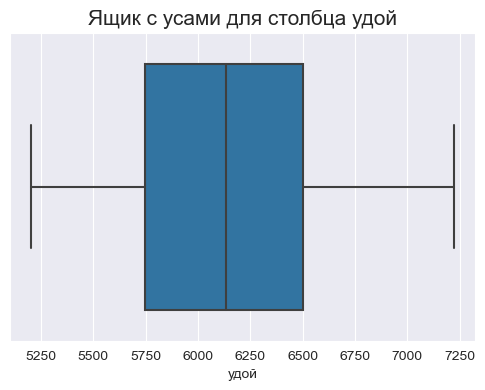

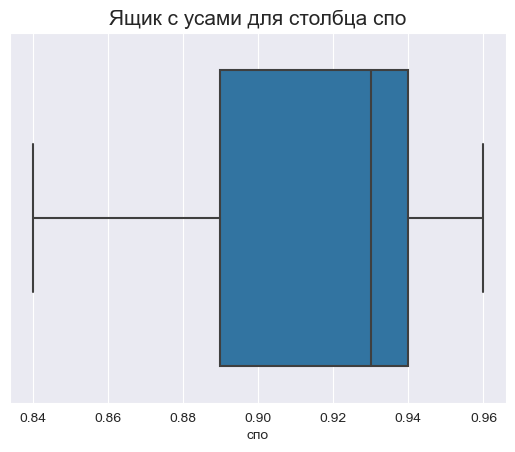

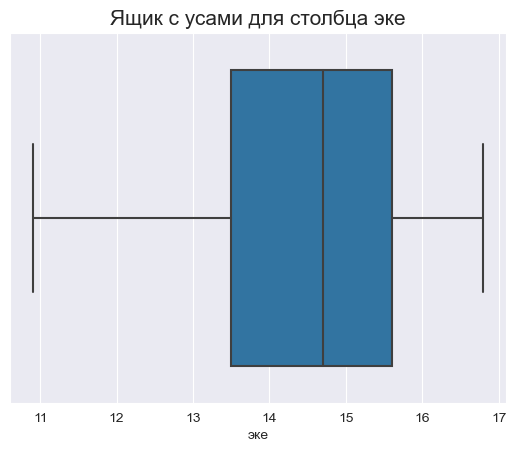

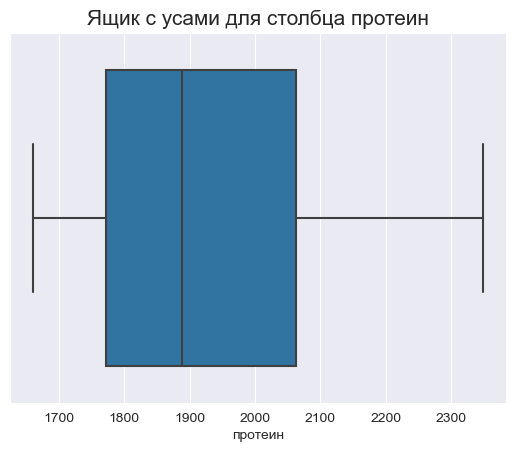

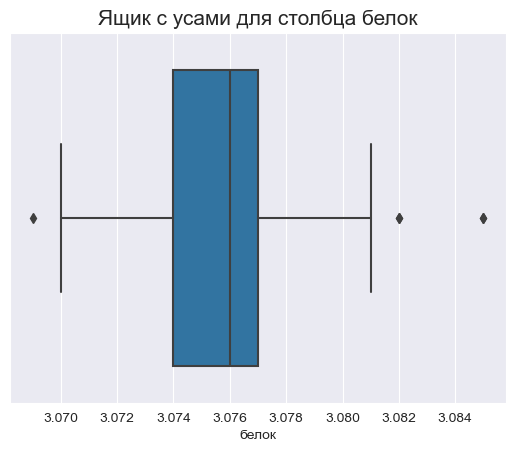

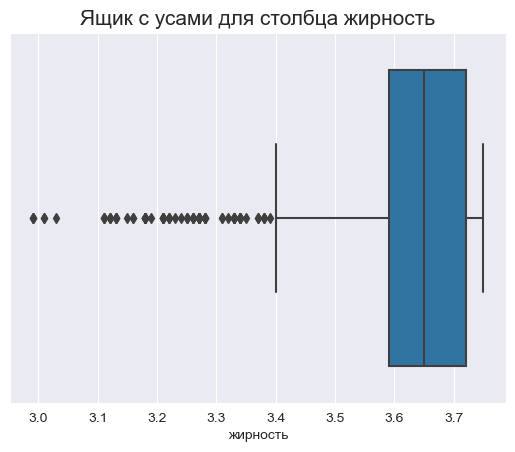

In [19]:
num_box = df_main[['удой', 'спо', 'эке', 'протеин', 'белок', 'жирность']]

plt.figure(figsize=(6, 4))

# Строим ящики с усами для каждого столбца
for column in num_box.columns:
    sns.boxplot(x=column, data=num_box)
    plt.title(f'Ящик с усами для столбца {column}', fontsize=15)
    plt.show()

Итоги по ящикам:

 - в столбце `удой` мы уже удалили выброс
 
 - в столбце `спо`, `протеин` и `эке` выбросов нет
 
 - в столбцах `белок` и `жирность` есть выбросы, их совсем немного, поэтому не будем от них избавляться

---

Посмотрим на распределения категориальных столбцов.

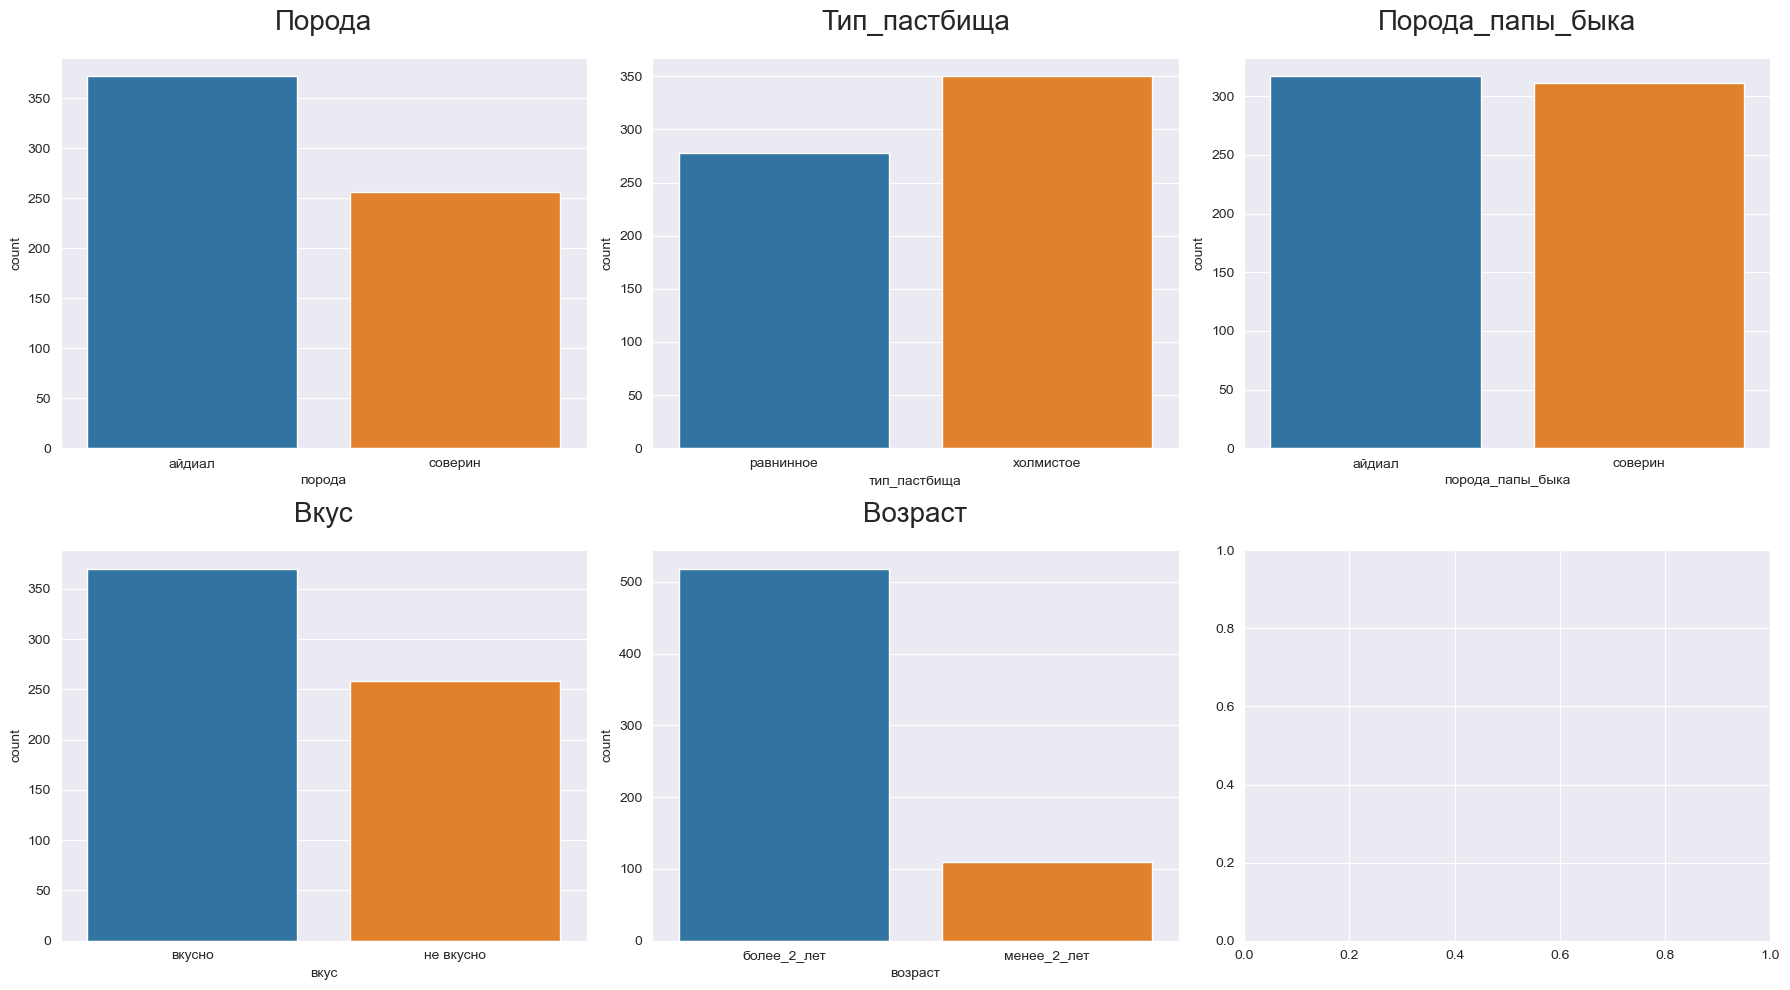

In [20]:
# Создание датафрейма с категориальными столбцами
df_cat = df_main.select_dtypes('object')

# Создание сетки для отображения графиков
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Построение столбчатых диаграмм для каждого категориального столбца
for i, column in enumerate(df_cat.columns):
    sns.countplot(x=column, data=df_cat, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(column.capitalize(), fontsize=20, pad=20)

plt.tight_layout()
plt.show()

 - Коров породы `айдиал` больше чем на 100 голов чем коров породы `соверин`
 
 - Чаще встречаются `холмистые` пастбища, чем `равнинные`
 - Количество отцов коров пород `айдиал` и `соверин` одинаковое
 - Фермер чаще характеризует молоко своих коров как `вкусное`, нежели `не вкусное`
 - Большинство коров старше двух лет.

---

## Корреляционный анализ

Посмотрим на корреляции между всеми признаками. Так как обычная корреляция Пирсона не работает с категориальными значениями, то воспользуемся корреляцией Фика.

interval columns not set, guessing: ['удой', 'эке', 'протеин', 'спо', 'жирность', 'белок']


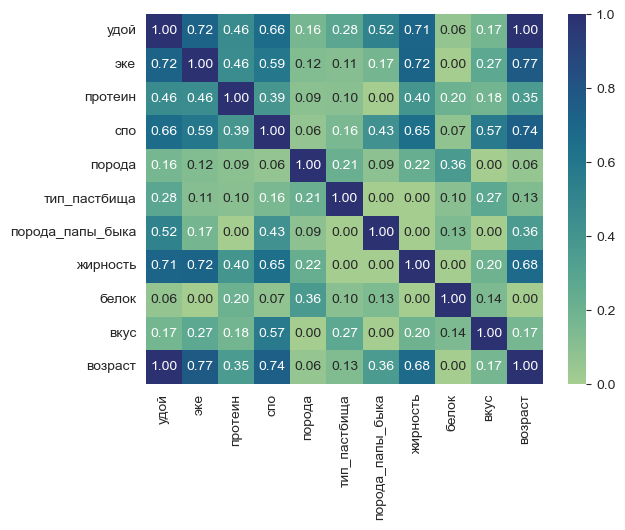

In [21]:
t = df_main.drop('id', axis=1)
sns.heatmap(t.phik_matrix(), annot=True, fmt='.2f', cmap="crest");

Теперь посмотрим на корреляции между числовыми признаками

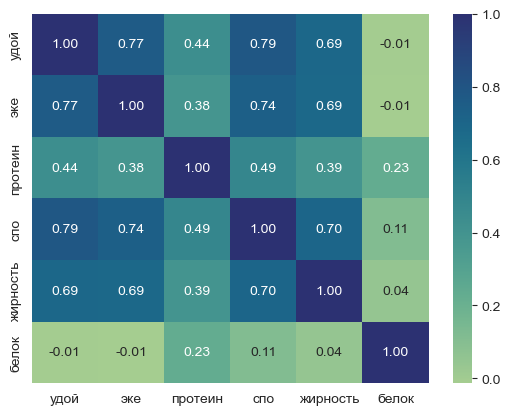

In [22]:
df_numeric = df_main[['удой', 'эке', 'протеин', 'спо', 'жирность', 'белок']]

sns.heatmap(df_numeric.corr(method='spearman'), annot=True, fmt='.2f', cmap="crest");

 - Самый высокий коэффициент корреляции между `удоем` и `спо` - **0.79**
 - Между `удоем` и `эке` - **0.77**
 - Между `удоем` и `жирностью` - **0.69**
 - Между `жирностью` и `эке` - **0.69**, `спо` - **0.70**
 - Между `эке` и `спо` - **0.74**

# Вкус

Постоим графики корреляции между удоем и всеми количественными признаками. Будем менять только цвета точек.

In [23]:
def scattering(hue):
    fig, axes = plt.subplots(3, 2, figsize=(10, 15))

    for i, column in enumerate(['эке', 'протеин', 'спо', 'жирность', 'белок']):
        row = i // 2
        col = i % 2
        sns.scatterplot(data=df_main, x=column, y='удой', hue=hue, ax=axes[row, col])
        sns.regplot(data=df_main, x=column, y='удой', scatter=False, ax=axes[row, col])
        axes[row, col].set_title(column.capitalize(), fontsize=20)

    plt.tight_layout()
    plt.show()

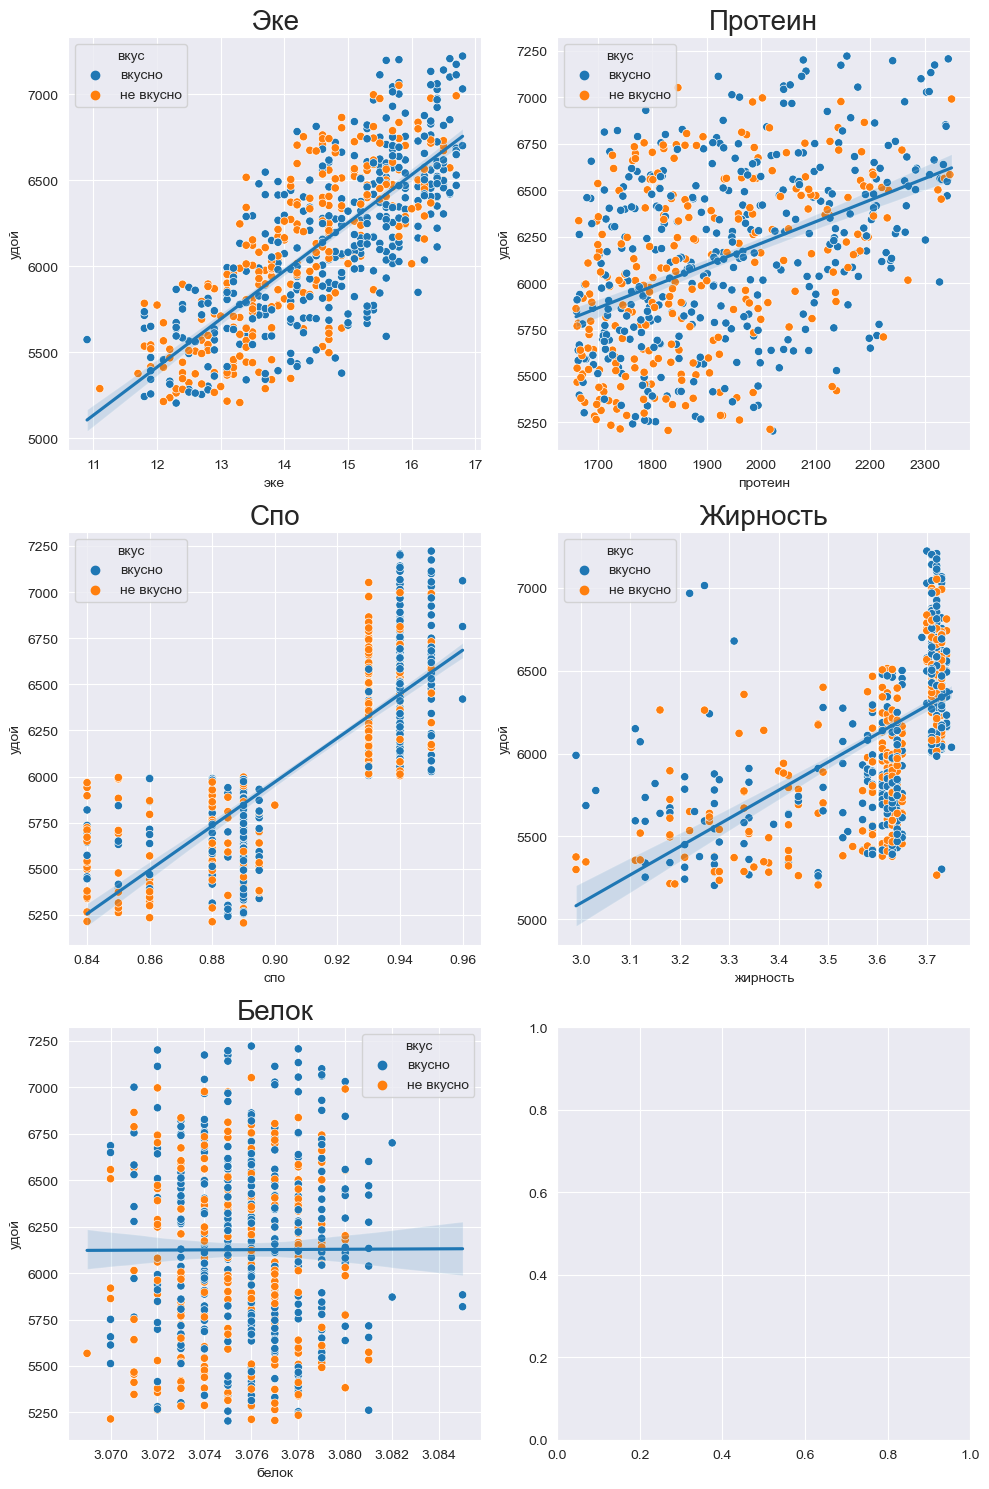

In [24]:
scattering('вкус')

# Порода

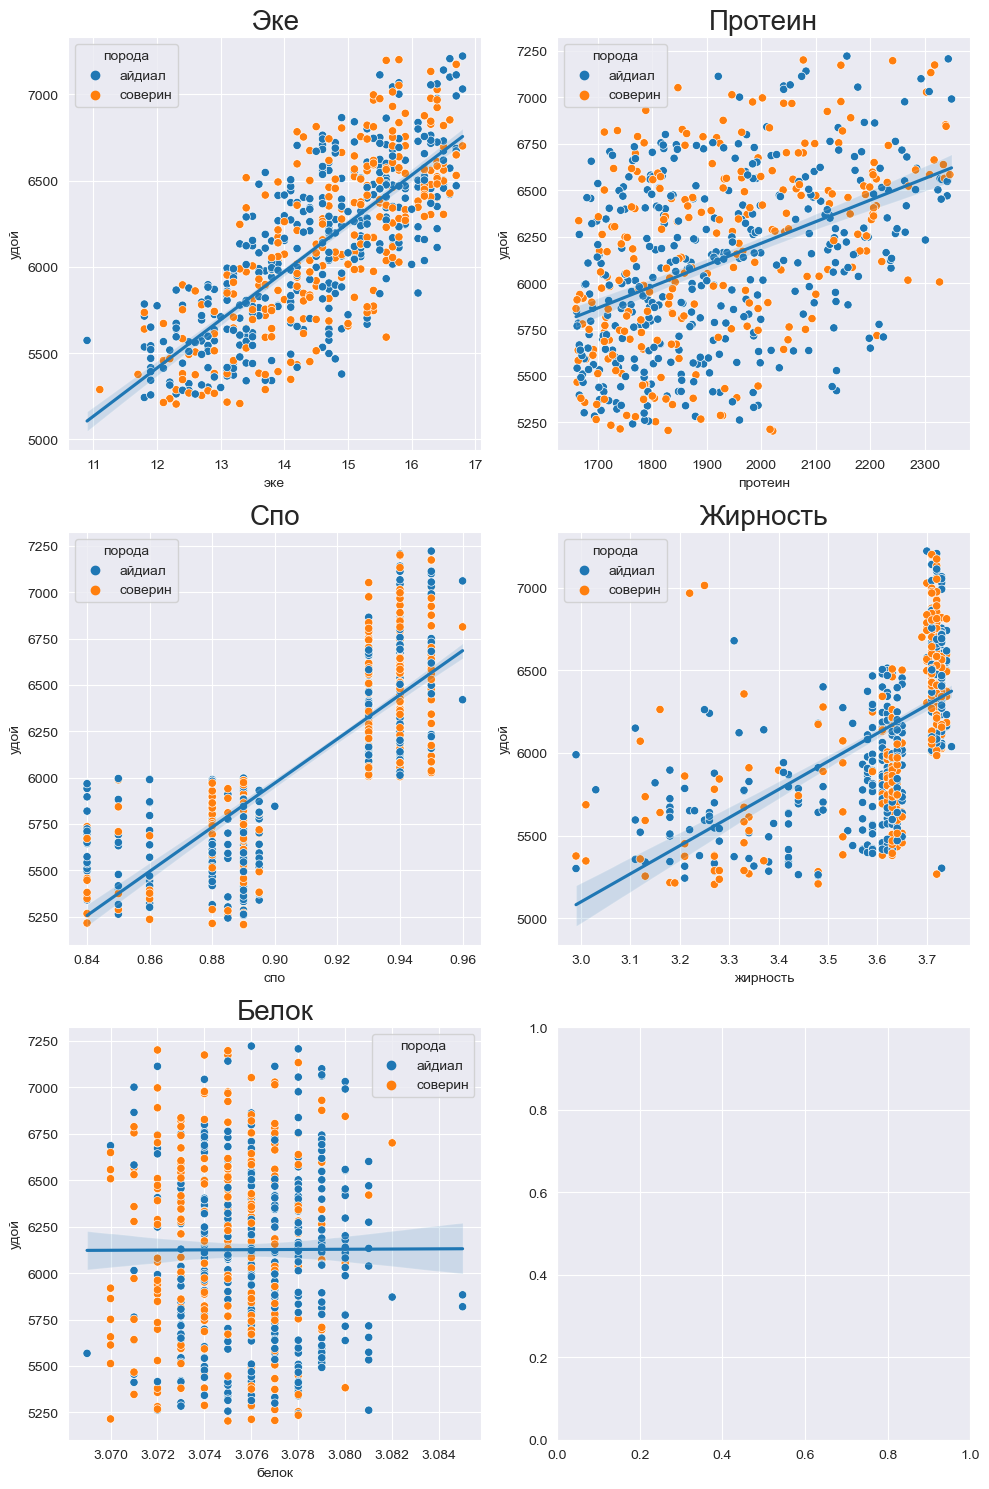

In [25]:
scattering('порода')

# Тип пастбища

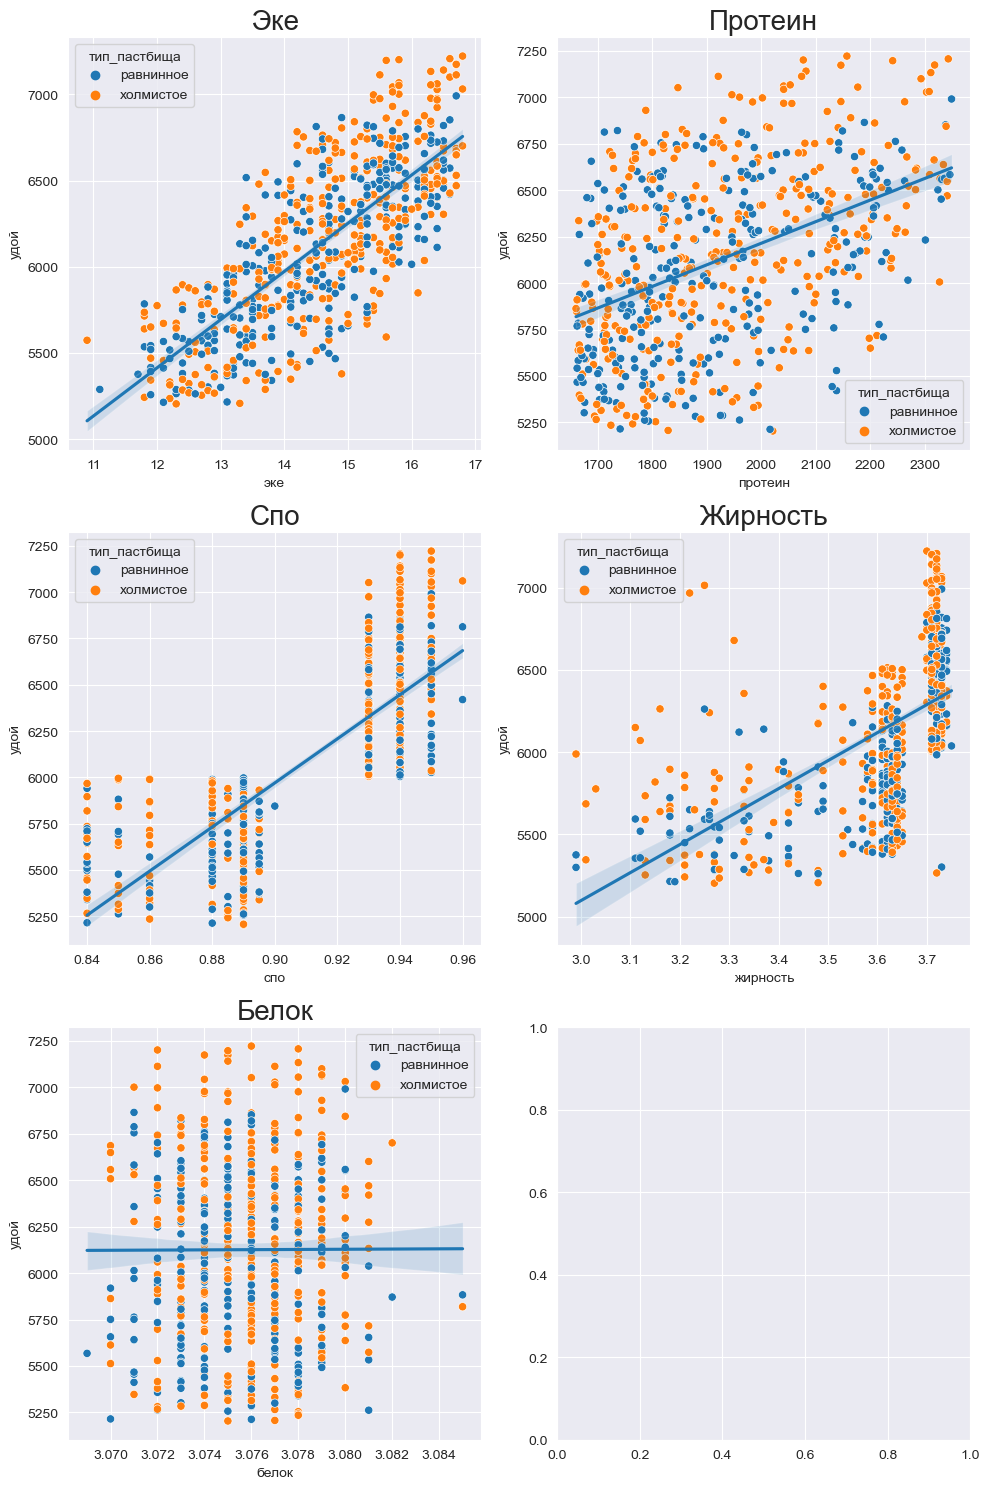

In [26]:
scattering('тип_пастбища')

# Порода папы быка

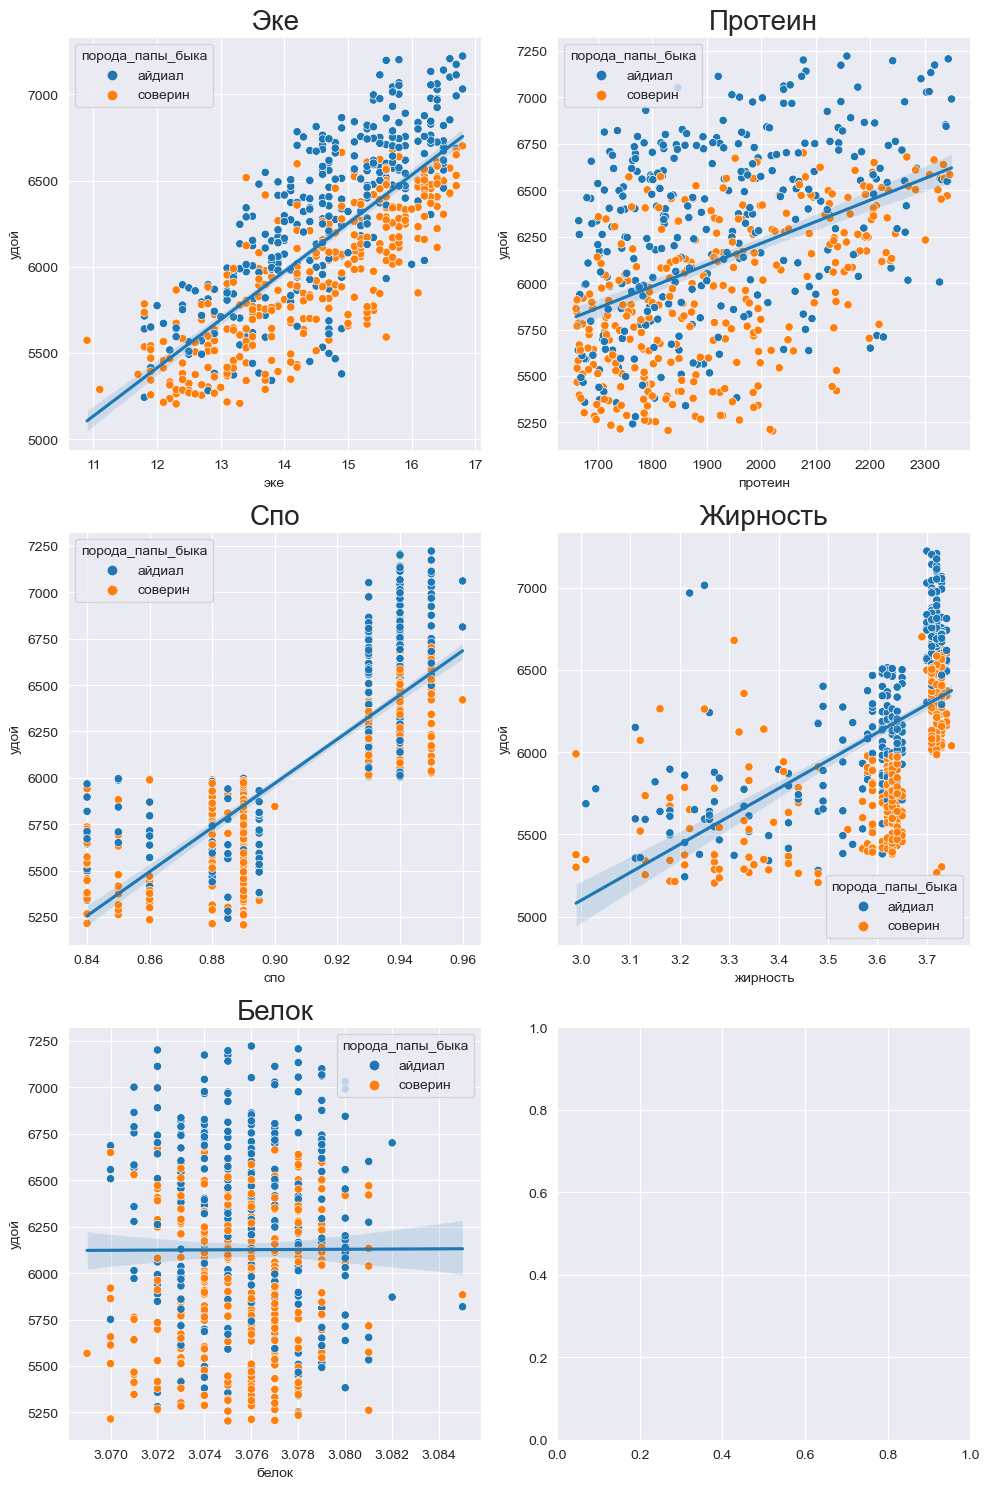

In [27]:
scattering('порода_папы_быка')

# Возраст

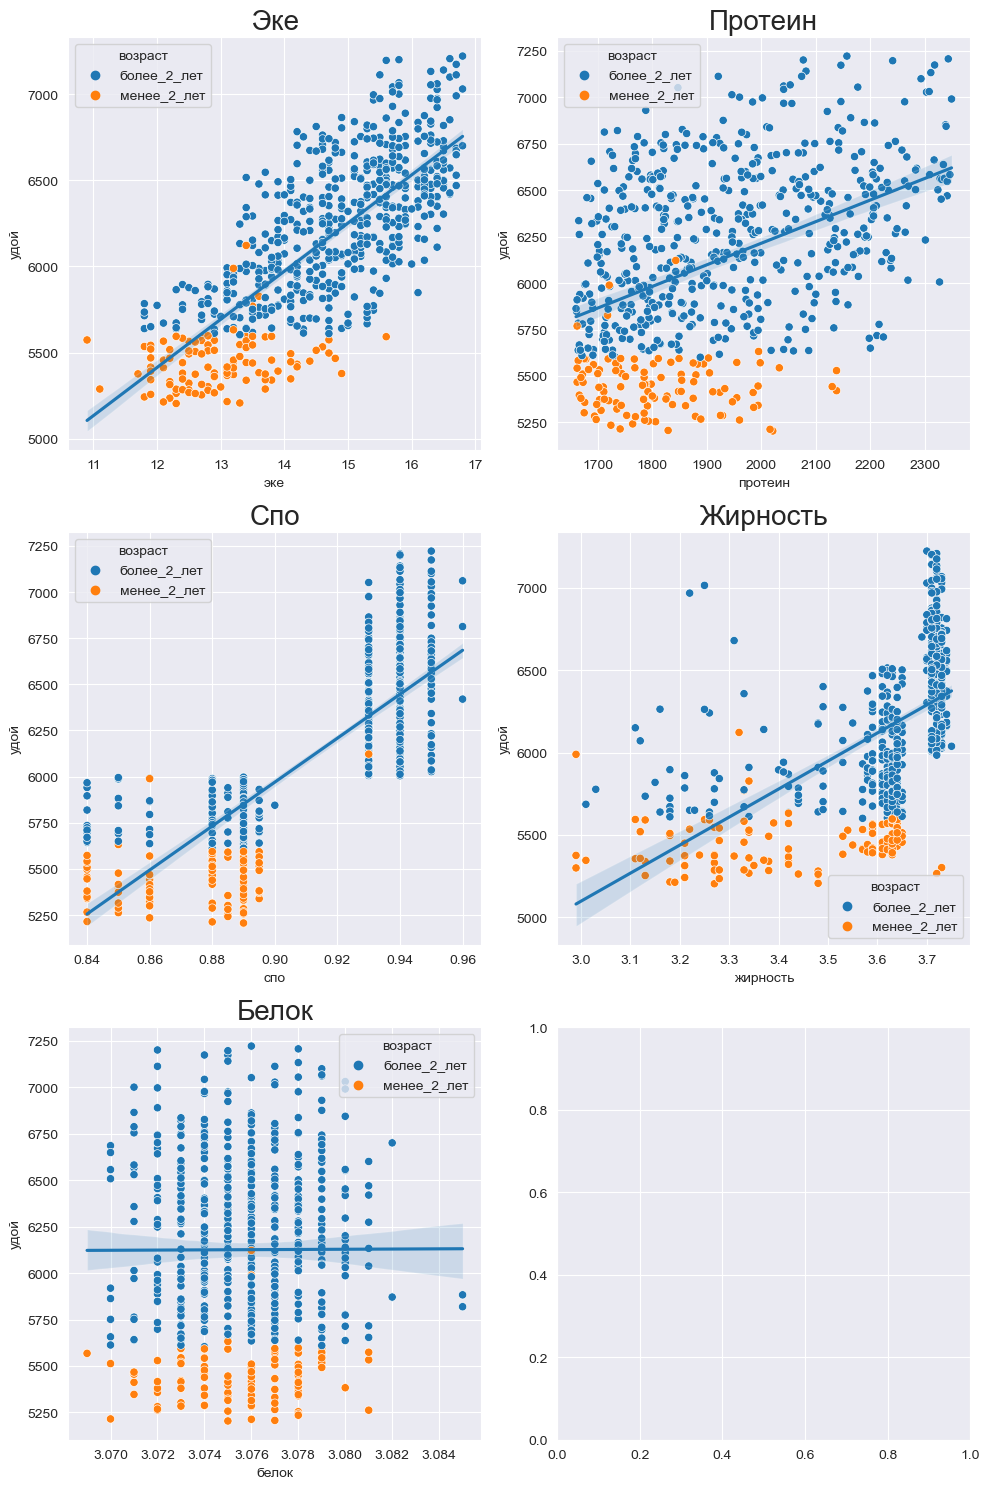

In [28]:
scattering('возраст')

 - Корреляцию между `удоем` и `эке` можно назвать похожей на линейную
 
 - между `удоем` и `протеином` можно назвать равномерной. На графике не наблюдается каких либо закономерностей
 - между `удоем` и `спо` точки делятся на два кластера, такое уже было на гистограмме. В дальнейшем будет целесообразным разделить `спо` по бинарному принципу, в качестве порога будет значение **0.92**
 - между`удоем` и `жирностью` наблюдается скопление точек в области **3.6-3.7%** жирности
 - Между `удоем` и `белком` никакой зависимости на графиках нет.
 
 Так же можно выделить, что СПО и удой связаны нелинейно. Коровы, в корме которых СПО меньше 0.92 приносят до 6000 кг молока в год, а с СПО больше 0.92 больше 6000 кг.
 
 Так как между признаками нет очень сильной корреляции (больше 0.9), то о мультиколлинеарности речи не идет.

---

In [29]:
# Выбираем только числовые признаки для анализа
numeric_features = df_main.select_dtypes(include=['float64', 'int64'])

# Добавляем столбец с константой для расчета VIF
numeric_features['Intercept'] = 1

# Создаем DataFrame для хранения результатов VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = numeric_features.columns

# Вычисляем VIF для каждого признака
vif_data["VIF"] = [variance_inflation_factor(numeric_features.values, i) for i in range(numeric_features.shape[1])]

# Выводим результаты
print(vif_data)

     Feature           VIF
0         id  1.015576e+00
1       удой  3.574164e+00
2        эке  2.960405e+00
3    протеин  1.375641e+00
4        спо  3.542310e+00
5   жирность  1.891801e+00
6      белок  1.089031e+00
7  Intercept  1.577143e+06


## Задача регрессии

# Линейная модель №1

Необходимо создать модель линейной регрессии, которая предсказывает количество молока, которое дает корова за год. 

В качестве целевого признака выступает **`удой`**

Так как корреляция между признаками `эке` и `спо` достаточно высокая, то оставим только один из них в качестве входного признака.

In [30]:
def metrics(y_true, y_pred):
    # Расчет метрик для оценки качества модели
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f'R2-score: {r2}\nMAE: {mae}\nMSE: {mse}\nRMSE: {rmse}')

In [31]:
RANDOM_STATE = 42
def train_linear_regression_model(dataframe, num_col, cat_col):
    # Выделение входных и целевого признаков
    X = dataframe.drop(['удой', 'id'], axis=1)
    y = dataframe['удой']

    # Разделение выборки
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)
    
    # Создание стандартизатора и кодировщика
    scaler = StandardScaler()
    encoder = OneHotEncoder(drop='first')

    # Стандартизация числовых признаков
    X_train_scaled = scaler.fit_transform(X_train[num_col])
    X_test_scaled = scaler.transform(X_test[num_col])

    # Кодирование категориальных признаков
    X_train_ohe = encoder.fit_transform(X_train[cat_col])
    X_test_ohe = encoder.transform(X_test[cat_col])

    # Названия новых столбцов
    encoder_col_names = encoder.get_feature_names_out()

    # Преобразование данных к DataFrame
    X_train_ohe_df = pd.DataFrame(X_train_ohe.toarray(), columns=encoder_col_names)
    X_test_ohe_df = pd.DataFrame(X_test_ohe.toarray(), columns=encoder_col_names)
    
    # Объединение стандартизированных числовых и закодированных категориальных признаков
    X_train = pd.concat([pd.DataFrame(X_train_scaled, columns=num_col), X_train_ohe_df], axis=1)
    X_test = pd.concat([pd.DataFrame(X_test_scaled, columns=num_col), X_test_ohe_df], axis=1)

    # Модель линейной регрессии
    model = LinearRegression()
    
    # Тренировка модели
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    predict = model.predict(X_train)
    residuals = y_train - predict
    
    # Определение нижнего и верхнего квантиля
    lower_quantile = np.percentile(residuals, 2.5)
    upper_quantile = np.percentile(residuals, 97.5)
    
    # Доверительный интервал прогноза
    confidence_interval = (predict.mean() + lower_quantile, predict.mean() + upper_quantile)
    
    metrics(y_test, y_pred)
    print("Доверительный интервал прогноза:", confidence_interval)
    return model, scaler, encoder, y_pred, y_test

In [32]:
num_col = ['эке', 'спо', 'протеин']
cat_col = ['порода', 'тип_пастбища', 'возраст', 'порода_папы_быка']

model_1, scaler_1, encoder_1, y_pred_1, y_test = train_linear_regression_model(df_main, num_col, cat_col)

R2-score: 0.7844078173416966
MAE: 164.24194463474922
MSE: 43887.015009660514
RMSE: 209.4922791170608
Доверительный интервал прогноза: (5724.5849055450335, 6533.878143860185)


Проанализируем и опишем остатки.

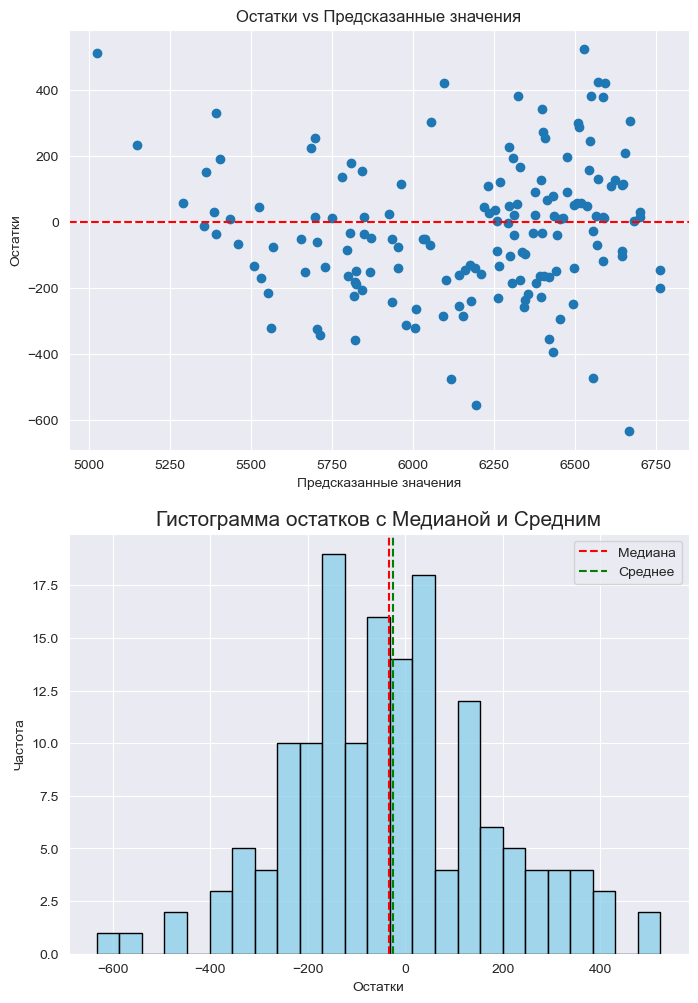

In [33]:
# Рассчитываем остатки
residuals = y_test - y_pred_1

# Создаем новый холст
fig, axs = plt.subplots(2, figsize=(8, 12))

# График остатков vs предсказанные значения
plt.subplot(2, 1, 1)
plt.scatter(y_pred_1, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('Остатки vs Предсказанные значения')

# Гистограмма остатков с медианой и средним
plt.subplot(2, 1, 2)
sns.histplot(residuals, bins=25, color='skyblue', edgecolor='black')
plt.axvline(x=np.median(residuals), color='red', linestyle='--', label='Медиана')
plt.axvline(x=np.mean(residuals), color='green', linestyle='--', label='Среднее')
plt.xlabel('Остатки')
plt.ylabel('Частота')
plt.title('Гистограмма остатков с Медианой и Средним', fontsize=15)
plt.legend()

plt.show()

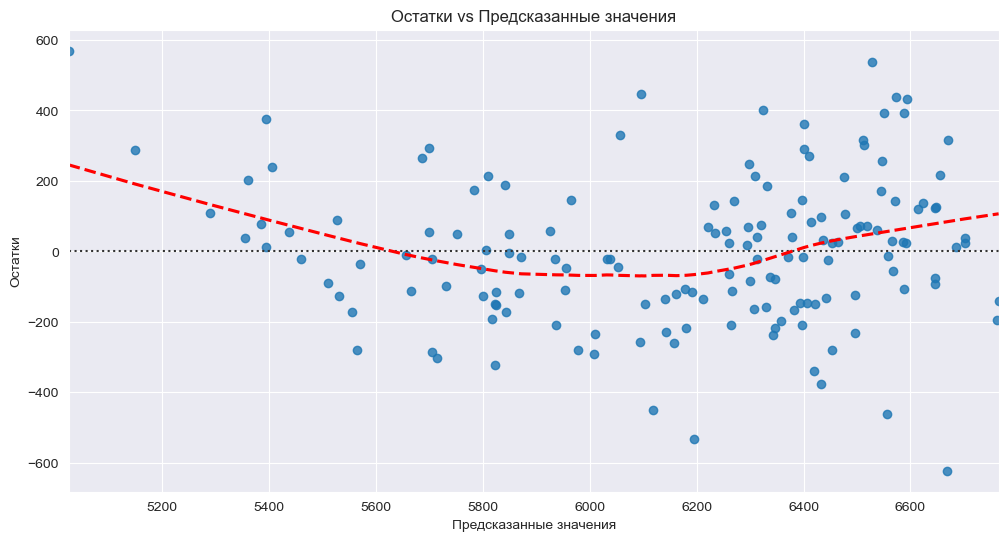

In [34]:
# Создаем датафрейм с данными
data = pd.DataFrame({'y_test': y_test, 'y_pred_1': y_pred_1})

# График остатков vs предсказанные значения
plt.figure(figsize=(12, 6))
sns.residplot(x='y_pred_1', y='y_test', data=data, lowess=True, line_kws={'color': 'red', 'linestyle': '--'})
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('Остатки vs Предсказанные значения');

 - R2-score первой модели составляет 0.78, пока что это недостаточное качество. Нужно добавить новые признаки и обработать предыдущие
 
 - Диаграмма размаха принимает форму **рупора**, что указывает на непостоянство дисперсии прогнозов нашей модели
 - Гистограмма имеет похожее на нормальное распределение, медиана и среднее почти равны, но меньше нуля, а это значит, что модель склонна немного завышать предсказания

# Линейная модель №2

Попробуем улучшить предыдущую модель посредством добавления новых признаков и преобразования старых.

СПО имеет нелинейную связь и распределен на 2 кластера. Посмотрим на гистограмму СПО 

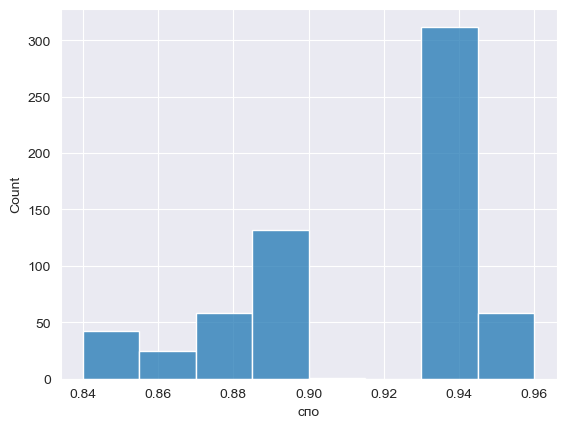

In [35]:
sns.histplot(data=df_main, x='спо', bins=8);

Добавим новый признак `спо_бинарный`, разделим по порогу **0.92**

In [36]:
df_main['спо_бинарный'] = df_main['спо'].apply(lambda x: 1 if x >= 0.92 else 0)
df_main['спо_бинарный'].value_counts()

спо_бинарный
1    370
0    258
Name: count, dtype: int64

Так же нелинейную связь с целевым признаком имеет ЭКЕ, устраним это, возведя ЭКЕ в квадрат.

In [37]:
df_main['эке_2'] = df_main['эке'] ** 2

In [38]:
num_col = ['эке_2']
cat_col = ['порода', 'порода_папы_быка', 'тип_пастбища', 'возраст', 'спо_бинарный']

model_2, scaler_2, encoder_2, y_pred_2, y_test = train_linear_regression_model(df_main, num_col, cat_col)

R2-score: 0.8147611518654808
MAE: 152.73826120151674
MSE: 37708.139544821126
RMSE: 194.18583765254644
Доверительный интервал прогноза: (5740.456969577897, 6549.127753448009)


Проанализируем и опишем остатки

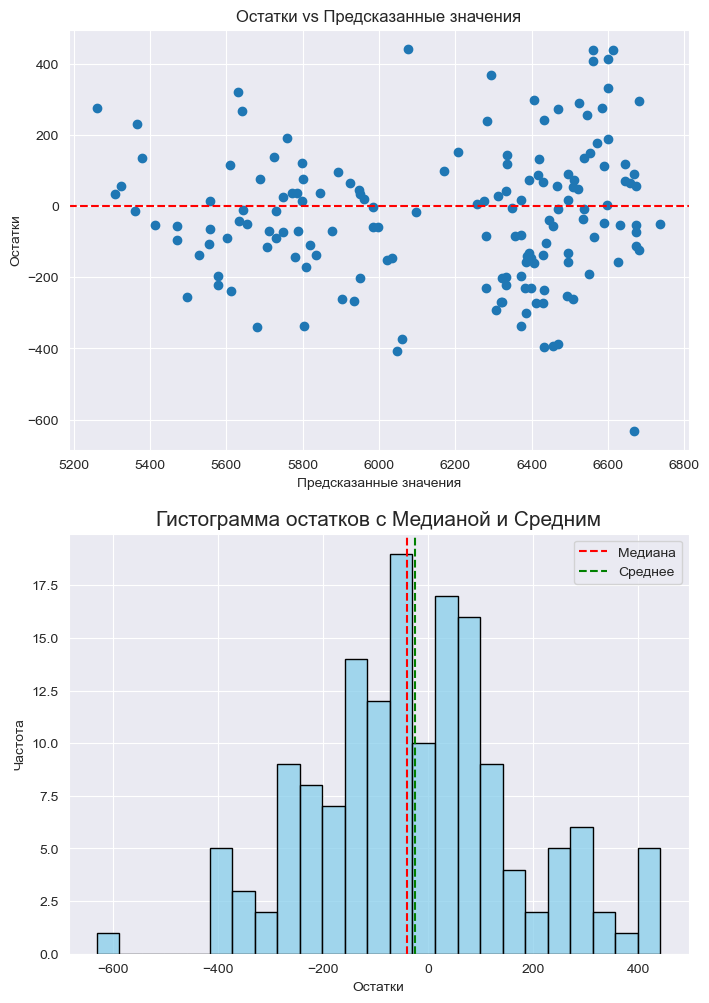

In [39]:
# Рассчитываем остатки
residuals = y_test - y_pred_2

# Создаем новый холст
fig, axs = plt.subplots(2, figsize=(8, 12))

# График остатков vs предсказанные значения
plt.subplot(2, 1, 1)
plt.scatter(y_pred_2, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('Остатки vs Предсказанные значения')

# Гистограмма остатков с медианой и средним
plt.subplot(2, 1, 2)
sns.histplot(residuals, bins=25, color='skyblue', edgecolor='black')
plt.axvline(x=np.median(residuals), color='red', linestyle='--', label='Медиана')
plt.axvline(x=np.mean(residuals), color='green', linestyle='--', label='Среднее')
plt.xlabel('Остатки')
plt.ylabel('Частота')
plt.title('Гистограмма остатков с Медианой и Средним', fontsize=15)
plt.legend()

plt.show()

 - R2-score модели равен **0.81**, очень заметное улучшение в качестве
 
 - Диаграмма размаха стала более равномерной, теперь дисперсия предсказанных значений на всем пути равномерная
 - На гистограмме медиана немного отдалилась от среднего, модель по прежнему склонна завышать предсказания.

# Линейная модель №3

Попробуем еще улучшить качество предсказаний.

Добавим в модель новый признак `имя_папы`

In [40]:
df_merged = df_main.merge(df_dad, on='id')

In [41]:
num_col = ['эке_2']
cat_col = ['порода', 'порода_папы_быка', 'тип_пастбища', 'возраст', 'спо_бинарный', 'имя_папы_быка']

model_3, scaler_3, encoder_3, y_pred_3, y_test = train_linear_regression_model(df_merged, num_col, cat_col)

R2-score: 0.8216699921420688
MAE: 148.69991738246677
MSE: 36301.741719170255
RMSE: 190.5301596051666
Доверительный интервал прогноза: (5769.051139632207, 6509.1754644561415)


Проанализируем и опишем остатки.

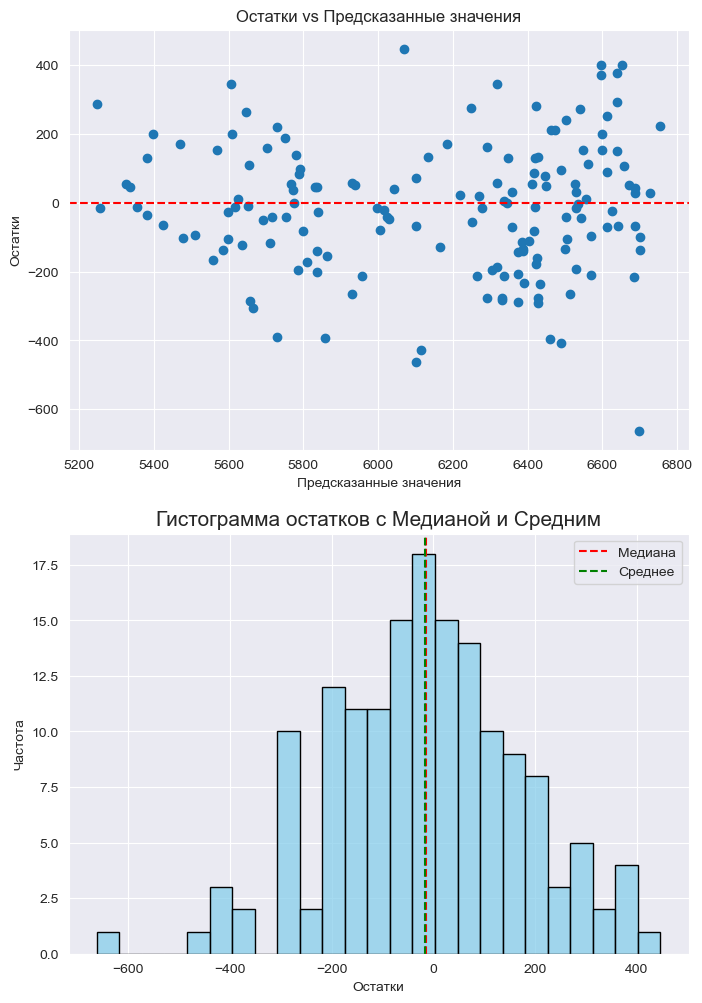

In [42]:
# Рассчитываем остатки
residuals = y_test - y_pred_3

# Создаем новый холст
fig, axs = plt.subplots(2, figsize=(8, 12))

# График остатков vs предсказанные значения
plt.subplot(2, 1, 1)
plt.scatter(y_pred_3, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('Остатки vs Предсказанные значения')

# Гистограмма остатков с медианой и средним
plt.subplot(2, 1, 2)
sns.histplot(residuals, bins=25, color='skyblue', edgecolor='black')
plt.axvline(x=np.median(residuals), color='red', linestyle='--', label='Медиана')
plt.axvline(x=np.mean(residuals), color='green', linestyle='--', label='Среднее')
plt.xlabel('Остатки')
plt.ylabel('Частота')
plt.title('Гистограмма остатков с Медианой и Средним', fontsize=15)
plt.legend()

plt.show()

 - R2-score модели равен **0.821**
 - Диаграмма размаха приобрела практически нормальный вид
 - На гистограмме медиана сравнялась со средним, модель совсем немного завышает значения предсказаний.

---

**Исходя из R2-оценки моделей (0.78, 0.81, 0.82) для предсказания выберем модель под номером 3**.

Добавим в датафрейм для предсказания числовые столбцы. Увеличим среднее значение каждого столбца на 5%.

In [43]:
df_buy['эке_2'] = (df_main['эке'].mean() * 1.05) ** 2
df_buy['спо'] = df_main['спо'].mean() * 1.05
df_buy['протеин'] = df_main['протеин'].mean() * 1.05
df_buy['спо_бинарный'] = df_buy['спо'].apply(lambda x: 1 if x >= 0.93 else 0)
df_buy.head()

,порода,тип_пастбища,порода_папы_быка,имя_папы_быка,жирность,белок,возраст,эке_2,спо,протеин,спо_бинарный
0,айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,233.361138,0.958744,2019.947532,1
1,айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет,233.361138,0.958744,2019.947532,1
2,соверин,равнинное,соверин,барин,3.59,3.074,более_2_лет,233.361138,0.958744,2019.947532,1
3,соверин,холмистое,айдиал,буйный,3.40,3.061,более_2_лет,233.361138,0.958744,2019.947532,1
4,соверин,равнинное,айдиал,буйный,3.64,3.074,более_2_лет,233.361138,0.958744,2019.947532,1


Подготовим данные для применения модели, сделаем прогноз и сохраним в датафрейм `df_buy`.

In [44]:
# Списки числовых и категориальных столбцов
num_col = ['эке_2']
cat_col = ['порода', 'порода_папы_быка', 'тип_пастбища', 'возраст', 'спо_бинарный', 'имя_папы_быка']

# Масштабирование и кодирование
df_buy_scaled = scaler_3.transform(df_buy[num_col])
df_buy_ohe = encoder_3.transform(df_buy[cat_col])

# Получение названий новых столбцов
encoder_col_names = encoder_3.get_feature_names_out()

# Создание датафрейма с закодированными данными
df_buy_ohe_df = pd.DataFrame(df_buy_ohe.toarray(), columns=encoder_col_names)

# Соединение в общий датафрейм
df_buy_processed = pd.concat([pd.DataFrame(df_buy_scaled, columns=num_col), df_buy_ohe_df], axis=1)

y_pred = model_3.predict(df_buy_processed)
y_pred_series = pd.Series(y_pred, index=df_buy.index)
df_buy['прогноз_удоя'] = y_pred_series
df_buy

,порода,тип_пастбища,порода_папы_быка,имя_папы_быка,жирность,белок,возраст,эке_2,спо,протеин,спо_бинарный,прогноз_удоя
0,айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,233.361138,0.958744,2019.947532,1,6596.711536
1,айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет,233.361138,0.958744,2019.947532,1,6357.172161
2,соверин,равнинное,соверин,барин,3.59,3.074,более_2_лет,233.361138,0.958744,2019.947532,1,6272.773280
3,соверин,холмистое,айдиал,буйный,3.40,3.061,более_2_лет,233.361138,0.958744,2019.947532,1,6579.576076
4,соверин,равнинное,айдиал,буйный,3.64,3.074,более_2_лет,233.361138,0.958744,2019.947532,1,6524.100277
5,соверин,равнинное,соверин,геркулес,3.63,3.053,менее_2_лет,233.361138,0.958744,2019.947532,1,6400.165474
6,айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,233.361138,0.958744,2019.947532,1,6596.711536
7,айдиал,равнинное,соверин,буйный,3.57,3.079,более_2_лет,233.361138,0.958744,2019.947532,1,6557.338101
8,соверин,равнинное,соверин,барин,3.59,3.074,более_2_лет,233.361138,0.958744,2019.947532,1,6272.773280
9,соверин,холмистое,айдиал,буйный,3.40,3.079,менее_2_лет,233.361138,0.958744,2019.947532,1,6379.410136


**Вывод:**

 - R2-score лучшей модели составляет **0.82**, RMSE **190**, MAE **148**
 
 - Модель предсказала для всех коров удой более **6000 кг** в год. Их явно очень хорошо кормят.
 
 - Доверительный интервал предсказаний модели - (5769 кг, 6509 кг)

---

## Задача классификации.

---

Необходимо по входным признакам классифицировать коров по принципу: дает вкусное молоко или не вкусное.

В качестве таргета выступает `вкус молока`.

Заменим строковые значения вкуса на бинарные классификаторы.

In [45]:
df_main['вкус'] = df_main['вкус'].replace({'вкусно': 1, 'не вкусно': 0})
df_main.head()

,id,удой,эке,протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус,возраст,спо_бинарный,эке_2
0,1,5863,14.2,1743,0.890,айдиал,равнинное,айдиал,3.58,3.076,1,более_2_лет,0,201.64
1,2,5529,12.8,2138,0.890,айдиал,равнинное,соверин,3.54,3.079,1,менее_2_лет,0,163.84
2,3,5810,14.0,1854,0.885,соверин,холмистое,соверин,3.59,3.074,0,более_2_лет,0,196.00
3,4,5895,12.4,2012,0.885,соверин,холмистое,айдиал,3.40,3.075,0,более_2_лет,0,153.76
4,5,5302,12.8,1675,0.885,айдиал,равнинное,соверин,3.73,3.073,1,менее_2_лет,0,163.84


Создадим модель логистической регрессии, удалим признаки, которые не могут влиять на вкус молока.

Accuracy: 0.6305732484076433
Precicsion: 0.625
Recall: 0.8522727272727273


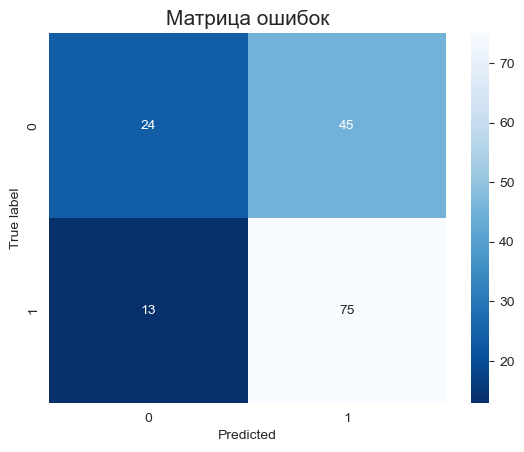

In [46]:
RANDOM_STATE = 42

X = df_main.drop(['id', 'вкус', 'эке', 'спо', 'удой'], axis=1)
y = df_main['вкус']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)

# Обьявление скейлера и энкодера
scaler = StandardScaler()
encoder = OneHotEncoder(drop='first')

# Списки столбцов
num_col = ['жирность', 'белок', 'эке_2', 'протеин', 'спо_бинарный']
cat_col = ['порода_папы_быка', 'порода', 'тип_пастбища', 'возраст']

# Масштабируем числовые столбцы
X_train_scaled = scaler.fit_transform(X_train[num_col])
X_test_scaled = scaler.transform(X_test[num_col])

# Кодируем категориальные признаки
X_train_ohe = encoder.fit_transform(X_train[cat_col])
X_test_ohe = encoder.transform(X_test[cat_col])

# Получаем названия новых столбцов
encoder_col_names = encoder.get_feature_names_out()

# Преобразование закодированных категориальных признаков в DataFrame
X_train_ohe_df = pd.DataFrame(X_train_ohe.toarray(), columns=encoder_col_names)
X_test_ohe_df = pd.DataFrame(X_test_ohe.toarray(), columns=encoder_col_names)

# Объединение стандартизированных числовых и закодированных категориальных признаков
X_train = pd.concat([pd.DataFrame(X_train_scaled, columns=num_col), X_train_ohe_df], axis=1)
X_test = pd.concat([pd.DataFrame(X_test_scaled, columns=num_col), X_test_ohe_df], axis=1)

# Обьявление модели
clf = LogisticRegression()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Рассчет метрик
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
precision = precision_score(y_test, y_pred)
print(f'Precicsion: {precision}')
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall}')

# Построение матрицы ошибок
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues_r')
plt.title('Матрица ошибок', fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted');

Модель отработала успешно. Исходя из матрицы ошибок, количество: 
 - TP = 75
 - ТN = 24
 - FP (ошибка первого рода) = 45
 - FN (ошибка второго рода) = 13
 
Так как для фермера самое важное это вкус молока, то наша задача - минимизировать количество ложноположительных прогнозов модели (предсказание не вкусного молока вкусным). 

За это отвечает метрика Precision.

Выведем веса коэффициентов, посмотрим на вклад каждого признака в предсказание.

In [47]:
# выводим веса коэффициентов
for feature_number, feature_name in enumerate(X.columns):
    exp_weight = math.exp(clf.coef_[0, feature_number])
    print(f"{feature_name:<20}: {exp_weight:+.2f}")

протеин             : +0.98
порода              : +1.31
тип_пастбища        : +1.86
порода_папы_быка    : +1.16
жирность            : +0.68
белок               : +0.91
возраст             : +1.10
спо_бинарный        : +1.69
эке_2               : +0.81


Самый большой вес у признаков `тип_пастбища` и `спо`.

Попробуем подобрать порог предсказания, чтобы свести к нулю количество ложноположительных ответов.

In [48]:
data = pd.DataFrame()
data['y_proba'] = clf.predict_proba(X_test)[:, 1]
thresholds = [round(i, 2) for i in np.linspace(0.7, 0.81, num=11, endpoint=False)]

for i in thresholds:
    data['y_pred_' + str(i)] = data['y_proba'].apply(lambda x: 1 if x >= i else 0)

# Вычисление precision, recall, FP и TP для каждого порога
for i in thresholds:
    y_pred = data['y_pred_' + str(i)]
    precision = precision_score(y_test, y_pred)
    
    cm = confusion_matrix(y_test, y_pred)
    FP = cm[0, 1]
    TP = cm[1, 1]
    
    print(f"Threshold: {i}")
    print(f"   Precision: {precision}")
    print(f"   FP: {FP}")
    print(f"   TP: {TP}")
    print()

Threshold: 0.7
   Precision: 0.8604651162790697
   FP: 6
   TP: 37

Threshold: 0.71
   Precision: 0.8717948717948718
   FP: 5
   TP: 34

Threshold: 0.72
   Precision: 0.868421052631579
   FP: 5
   TP: 33

Threshold: 0.73
   Precision: 0.8529411764705882
   FP: 5
   TP: 29

Threshold: 0.74
   Precision: 0.8518518518518519
   FP: 4
   TP: 23

Threshold: 0.75
   Precision: 0.875
   FP: 3
   TP: 21

Threshold: 0.76
   Precision: 0.8421052631578947
   FP: 3
   TP: 16

Threshold: 0.77
   Precision: 0.8823529411764706
   FP: 2
   TP: 15

Threshold: 0.78
   Precision: 0.8461538461538461
   FP: 2
   TP: 11

Threshold: 0.79
   Precision: 0.8
   FP: 2
   TP: 8

Threshold: 0.8
   Precision: 1.0
   FP: 0
   TP: 8



Как видно, при пороге равном **0.8** количество ложноположительных ответов равно нулю, количество истинно положительных больше нуля и Precision равен единице.

Применим модель с учетом порога **0.8**

Accuracy: 0.49044585987261147
Precicsion: 1.0
Recall: 0.09090909090909091


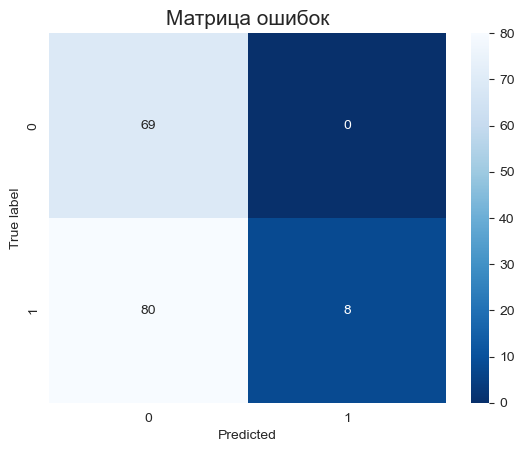

In [49]:
# Порог классификации
threshold = 0.8

# Получение вероятностей предсказаний
y_pred_proba = clf.predict_proba(X_test)[:,1]

# Применение порога
y_pred = (y_pred_proba >= threshold).astype(int)

# Рассчет метрик
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
precision = precision_score(y_test, y_pred)
print(f'Precicsion: {precision}')
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall}')

# Построение матрицы ошибок
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues_r')
plt.title('Матрица ошибок', fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted');

**Вывод:**

 - Мы построили модель логистической регрессии
 
 - Изначальная отметка Accuracy = 0.63, Precision = 0.62, Recall = 0.85
 
 - Подобрали порог классификации = **0.8**, при котором количество ложноположительных ответов равно нулю
 
 - При пороге **0.8** Accuracy = 0.49, Precision = 1, Recall = 0.09

# Применение модели

Подготовим датафрейм `df_buy` к применению модели и сделаем прогноз.

Создадим новый столбец с прогнозом вкуса молока.

In [50]:
# Масштабируем числовые столбцы
df_buy_scaled = scaler.transform(df_buy[num_col])

# Кодируем категориальные признаки
df_buy_ohe = encoder.transform(df_buy[cat_col])

# Названия новых столбцов
encoder_col_names = encoder.get_feature_names_out()

# Преобразование закодированных категориальных признаков в DataFrame
df_buy_ohe_df = pd.DataFrame(df_buy_ohe.toarray(), columns=encoder_col_names)

# Объединение стандартизированных числовых и закодированных категориальных признаков
df_buy_processed = pd.concat([pd.DataFrame(df_buy_scaled, columns=num_col), df_buy_ohe_df], axis=1)

# Применение модели к датафрейму df_buy
y_buy_pred_proba = clf.predict_proba(df_buy_processed)[:, 1]

# Порог precision=0.8
threshold = 0.8
y_buy_pred_thresh = (y_buy_pred_proba >= threshold).astype(int)

# Вывод результатов с порогом
df_buy['прогноз_вкуса'] = y_buy_pred_thresh
df_buy['прогноз_вкуса'].sum()

0

Теперь поменяем порог всё так же с минимальным риском.

In [51]:
# Порог precision=0.74
threshold = 0.74
y_buy_pred_thresh = (y_buy_pred_proba >= threshold).astype(int)

# Вывод результатов с порогом
df_buy['прогноз_вкуса'] = y_buy_pred_thresh
df_buy['прогноз_вкуса'].sum()

2

In [52]:
df_buy[df_buy['прогноз_вкуса'] == 1]

,порода,тип_пастбища,порода_папы_быка,имя_папы_быка,жирность,белок,возраст,эке_2,спо,протеин,спо_бинарный,прогноз_удоя,прогноз_вкуса
9,соверин,холмистое,айдиал,буйный,3.40,3.079,менее_2_лет,233.361138,0.958744,2019.947532,1,6379.410136,1
16,айдиал,холмистое,соверин,соловчик,3.73,3.079,более_2_лет,233.361138,0.958744,2019.947532,1,6355.417362,1


---

**Вывод:**

- При пороге классификации равном **0.8** наша модель не предсказала ни одной "вкусной" коровы.

 - Если понизить это значение, то и прогноз будет более богатым, например, при пороге 0.74, модель предсказывает целых 2 вкусных коровы.

---

<div style="background-color:#C1F9DA; padding:10px;">
    
# Финальный вывод.
    
В ходе проекта было выполнено несколько этапов:
    
 # 1. Предобработка данных 
    
  - На этом этапе были переименованы столбцы;
  - строки приведены в нижний регистр;
  - значения в столбцах приведены к корректному типу данных;
  - обработаны дубликаты;
  - названия пород и пастбищ приведены к одному виду.
    
 # 2. Исследовательский анализ данных
    
 - были удалены выбросы;
 ---
 - были построены гистограммы по всем количественным значениям в исходном датафрейме:
    
     - Распределение `удоя` имеет вид нормального и небольшой всплеск в районе **6500 кг**
 
     - Распределение `протеина` скошено вправо, чаще всего в корме **1700-1800 г** протеина
     - Распределение `эке` скошено влево, чаще всего эта единица в районе **14-16**
     - Распределение `спо` разделено на 2 кластера, а разделяет их значение **0.90-0.92**
     - Распределение `белка` может указывать на нормальное распределение значений вокруг центрального пика с некоторой асимметрией
     - Распределение `жирности` скошено вправо, юольшинство значений лежат в интервале **3.5-3.65**
    ---
 - были построены столбчатые диаграммы по категориальным признакам:
    
     - Коров породы `айдиал` больше чем на 100 голов чем коров породы `соверин`
 
     - Чаще встречаются `холмистые` пастбища, чем `равнинные`
     - Количество отцов коров пород `айдиал` и `соверин` одинаковое
     - Фермер чаще характеризует молоко своих коров как `вкусное`, нежели `не вкусное`
     - Большинство коров старше двух лет.
    
    
    ---
    
 # 3. Корреляционный анализ
    
 - Самый высокий коэффициент корреляции между `удоем` и `спо` - **0.81**
 - Между `удоем` и `эке` - **0.77**
 - Между `удоем` и `жирностью` - **0.60**
 - Между `эке` и `спо` - **0.75**
 - Корреляцию между `удоем` и `эке` можно назвать похожей на линейную
 
 - между `удоем` и `протеином` можно назвать равномерной. На графике не наблюдается каких либо закономерностей
 - между `удоем` и `спо` точки делятся на два кластера, такое уже было на гистограмме. В дальнейшем будет целесообразным разделить `спо` по бинарному принципу, в качестве порога будет значение **0.92**
 - между`удоем` и `жирностью` наблюдается скопление точек в области **3.6-3.7%** жирности
 - Между `удоем` и `белком` никакой зависимости на графиках нет.
    
    ---
 # 4. Построение моделей линейной регрессии.
    
 Было построено 3 модели линейной регрессии для одной задачи - прогноз удоя:
    
 - Первая модель имела обычные входные признаки без любых трансформаций. R2-score модели составил **0.61**
    
 - Во вторую модель был добавлен признак `эке в квадрате`, а признак `спо` был разделен как бинарный. R2-score модели составил **0.81**
    
 - В третью модель был добавлен последний признак `имя_папы_коровы`, но сильно на метрики он не повлиял. R2-score модели составил **0.82**
    
 После применения модели на выборке для прогноза модель присвоила каждой корове прогноз более 6000 кг молока в год.
    
---
 # 5. Построение модели логистической регрессии
    
 Была построена модель логистической регрессии, которая при работе на тестовых данных дала значения метрик Accuracy = 0.63,
Precicsion = 0.625, Recall = 0.85
    
 Нашей целью было минимизировать количество ложноположительных ответов, чего мы успешно добились, при пороге **0.8** метрика Precision при стала равна 1, а количество ложноположительных ответов стало равно нулю.

 К сожалению выборка из коров на покупку слишком маленькая, из-за чего при пороге классификации 0.8 ни у одной коровы не оказалось вкусного молока.
    
При пороге классификации **0.72** мы предсказали 2 вкусных коровы.
    
    
Это так же может быть связано с недостаточным количеством факторов в нашей выбооке, влияющих на вкус молока. Но, если точность не важна так сильно, то можно допустить небольшой риск. Например, на тестовой выборке при пороге классификации 0.72 количество ложноположительных ответов равнялось 5, когда истинно положительных ответов было 34. Следовательно, допуская риск в 15%, можно получить достаточно большую выгоду. 
    
 Но, учитывая, что заказчику важен именно вкус молока, то из предоставленной на покупку выборки нам не подходит ни одна корова. Попросим предоставить данные о других коровах, или добавить новые признаки для предсказания характеристик молока.
    
 